#🧠 What is LSTM?

LSTM stands for Long Short-Term Memory,
and it’s a special type of Recurrent Neural Network (RNN).

It was designed to solve a major problem in regular RNNs —
the vanishing gradient problem, which makes it hard for RNNs to remember information from long sequences.

A basic RNN processes text word by word, maintaining a hidden state that carries some memory of previous words.

But when sentences get long (e.g., 30+ words),
early information (like the subject of a sentence) is often forgotten by the time later words are processed.

#LSTM Architecture
LSTM architectures involves the memory cell which is controlled by three gates:

1. Input gate: Controls what information is added to the memory cell.
2. Forget gate: Determines what information is removed from the memory cell.
3. Output gate: Controls what information is output from the memory cell.

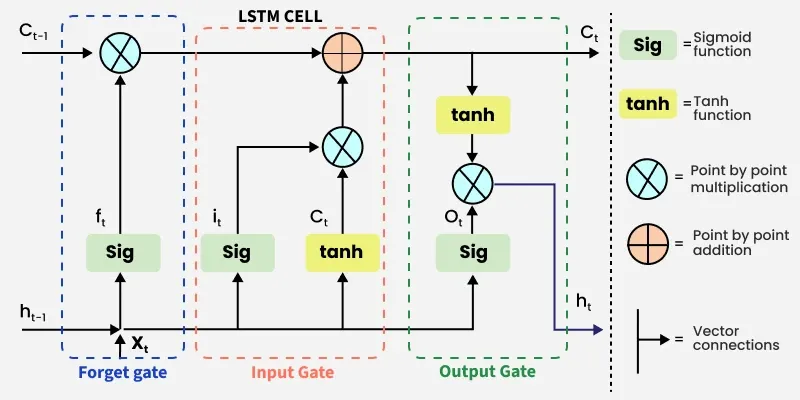

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from sklearn.utils import resample
import tensorflow as tf

In [ ]:
df = pd.read_csv("/content/spam_or_not_spam.csv")
df.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
df_minority = df[df.label==1]
df_majority = df[df.label==0]

df_minority_upsampled = resample(
                            df_minority,
                            replace = True,
                            n_samples=len(df_majority),
                            random_state=42

)
df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced.head()

texts = df_balanced['email'].values
labels = df_balanced['label'].values

print(labels)

[0 0 0 ... 1 1 1]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

type(texts)
tokenizer.fit_on_texts(texts.astype(str))

sequences = tokenizer.texts_to_sequences(texts.astype(str))
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length), #trainable embedding layer (or randomly initialized embeddings).
    LSTM(100, return_sequences=False),   # The “100” are memory cells (not layers).
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.6683 - loss: 0.7035 - val_accuracy: 0.8590 - val_loss: 0.4560
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.8520 - loss: 0.4250 - val_accuracy: 0.8620 - val_loss: 0.3673
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.8604 - loss: 0.3649 - val_accuracy: 0.8660 - val_loss: 0.3555
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 0.8726 - loss: 0.3310 - val_accuracy: 0.8800 - val_loss: 0.3347
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9181 - loss: 0.2632 - val_accuracy: 0.8660 - val_loss: 0.3715
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.8529 - loss: 0.3926 - val_accuracy: 0.8580 - val_loss: 0.3500
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.8522 - loss: 0.3524 - val_accuracy: 0.8900 - val_loss: 0.2312
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8468 - loss: 0.3242 - val_accu

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9814 - loss: 0.0621
Test Accuracy: 0.982


In [ ]:
test_texts = [
    # Likely SPAM
    "Dear customer, your account has been suspended due to unusual activity. Please verify your information immediately at secure-login-update.net.",

    "WINNER! You’ve been selected for a complimentary 7-day cruise to the Bahamas! Call 1-800-555-7890 now to claim your ticket before midnight!",

    "Important: Your mobile number has won £500,000 in our annual lucky draw. To receive your prize, send your full name and address to claim@luckydraw.uk.",

    "Act now! Get a brand new iPhone 15 for just $1. Limited stock available. Click the link below to reserve yours today!",

    "This is to inform you that your PayPal account will be closed within 24 hours unless you update your billing information. Click here to continue: paypal-secure-confirm.net.",

    # Likely NOT SPAM
    "Hey, just wanted to check if you’re free this weekend to discuss the project plan. I’ve shared the documents on Google Drive.",

    "Your appointment with Dr. Rahman has been confirmed for 10:30 AM on Monday. Please reply CONFIRM to keep the slot.",

    "The university has announced new scholarship programs for postgraduate students. Check the notice board or portal for more information.",

    "Hi Mom, I’ve reached safely! The flight was delayed but everything’s fine. Talk to you soon.",

    "Reminder: Your water bill for this month is ready. You can pay online via the city’s official payment portal before the 25th."
]


test_seq = tokenizer.texts_to_sequences(test_texts)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding='post')
predictions = model.predict(test_pad)

for text, pred in zip(test_texts, predictions):
    print(f"{text} → {'Spam' if pred > 0.5 else 'Not Spam'} ({pred[0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Dear customer, your account has been suspended due to unusual activity. Please verify your information immediately at secure-login-update.net. → Spam (0.99)
WINNER! You’ve been selected for a complimentary 7-day cruise to the Bahamas! Call 1-800-555-7890 now to claim your ticket before midnight! → Spam (0.99)
Important: Your mobile number has won £500,000 in our annual lucky draw. To receive your prize, send your full name and address to claim@luckydraw.uk. → Spam (0.99)
Act now! Get a brand new iPhone 15 for just $1. Limited stock available. Click the link below to reserve yours today! → Spam (0.99)
This is to inform you that your PayPal account will be closed within 24 hours unless you update your billing information. Click here to continue: paypal-secure-confirm.net. → Spam (0.99)
Hey, just wanted to check if you’re free this weekend to discuss the project plan. I’ve shared the documents on Google Drive. → Not Spam (0.12)
Your appointment with 


#🧠 What is BiLSTM?

BiLSTM stands for Bidirectional Long Short-Term Memory.

It’s basically two LSTMs combined:

One reads the sentence from left to right (→)

Another reads the sentence from right to left (←)

Then their outputs are merged (often concatenated)

#🔁 Why do this?

A normal LSTM can only see past context —
it processes words sequentially in one direction (usually left to right).

But in many NLP tasks, future context also matters.

#Example:

“I saw a bat.”

You don’t know if “bat” means 🦇 (animal) or 🏏 (cricket bat)
until you see the next words — like “flying” vs “on the field”.

So BiLSTM reads both directions:

Forward LSTM captures past context

Backward LSTM captures future context

Together they give a full understanding of each word’s meaning.
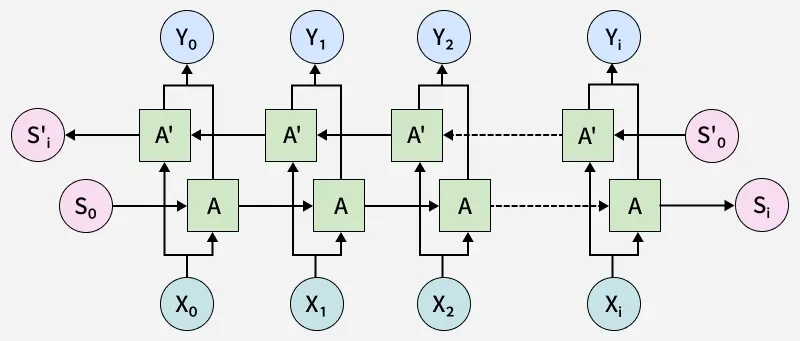

Here:

 1. Xi is the input token and Yi is the output token
 2. A and A' are the forward and backward LSTM units
 3. Final output Yi is the combination of A and A'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(100, return_sequences=False)), #Bidirectional(LSTM(100)): wraps an LSTM so it runs forward and backward
                                                                                                      #Each direction has 100 memory units → total 200 features at each step
     Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - accuracy: 0.7549 - loss: 0.5195 - val_accuracy: 0.9860 - val_loss: 0.0424
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.9928 - loss: 0.0268 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy: 0.9980 - val_loss: 0.0067
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.9980 - val_loss: 0.0085
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.9987 - loss: 0.0035 - val_accuracy: 0.9910 - val_loss: 0.0240
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9870 - val_loss: 0.0425
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.9948 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9997 - loss: 8.3701e-04 - val_

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9653 - loss: 0.0754
Test Accuracy: 0.968


In [ ]:
test_texts = [
    # Likely SPAM
    "Dear customer, your account has been suspended due to unusual activity. Please verify your information immediately at secure-login-update.net.",

    "WINNER! You’ve been selected for a complimentary 7-day cruise to the Bahamas! Call 1-800-555-7890 now to claim your ticket before midnight!",

    "Important: Your mobile number has won £500,000 in our annual lucky draw. To receive your prize, send your full name and address to claim@luckydraw.uk.",

    "Act now! Get a brand new iPhone 15 for just $1. Limited stock available. Click the link below to reserve yours today!",

    "This is to inform you that your PayPal account will be closed within 24 hours unless you update your billing information. Click here to continue: paypal-secure-confirm.net.",

    # Likely NOT SPAM
    "Hey, just wanted to check if you’re free this weekend to discuss the project plan. I’ve shared the documents on Google Drive.",

    "Your appointment with Dr. Rahman has been confirmed for 10:30 AM on Monday. Please reply CONFIRM to keep the slot.",

    "The university has announced new scholarship programs for postgraduate students. Check the notice board or portal for more information.",

    "Hi Mom, I’ve reached safely! The flight was delayed but everything’s fine. Talk to you soon.",

    "Reminder: Your water bill for this month is ready. You can pay online via the city’s official payment portal before the 25th."
]


test_seq = tokenizer.texts_to_sequences(test_texts)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding='post')
predictions = model.predict(test_pad)

for text, pred in zip(test_texts, predictions):
    print(f"{text} → {'Spam' if pred > 0.5 else 'Not Spam'} ({pred[0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Dear customer, your account has been suspended due to unusual activity. Please verify your information immediately at secure-login-update.net. → Spam (0.99)
WINNER! You’ve been selected for a complimentary 7-day cruise to the Bahamas! Call 1-800-555-7890 now to claim your ticket before midnight! → Spam (0.67)
Important: Your mobile number has won £500,000 in our annual lucky draw. To receive your prize, send your full name and address to claim@luckydraw.uk. → Spam (0.83)
Act now! Get a brand new iPhone 15 for just $1. Limited stock available. Click the link below to reserve yours today! → Spam (1.00)
This is to inform you that your PayPal account will be closed within 24 hours unless you update your billing information. Click here to continue: paypal-secure-confirm.net. → Spam (0.99)
Hey, just wanted to check if you’re free this weekend to discuss the project plan. I’ve shared the documents on Google Drive. → Not Spam (0.23)
Your appointment with 